# Dynamical system learning
This notebook is dedicated to the analysis of the dynamical system layer for time series learning. The model is defined by
$$\hat{y}_{t+1}=G_H(\hat{y}_t),$$
where $G_H$ with weights $H=[H_1, H_2]$ defined by
$$G_H(y)=H_1y+\phi_{H_2}(y)$$
where $\phi_{H_2}$ is the quadratic form in $y.$ 

The organization of this notebook is the following:
- Pendulum
    - Running model
    - Model analysis with noise
- Lorenz attractor
    - Running model
    - Model analysis with noise.
    
The pendulum and the Lorenz attractor are the simulated dynamical system to test the model. First, we run the model on the dataset by adding step-by-step complexities. Then we add noise to the data and simulate the model forty times with different values of selected hyperparameters and analyze how the model behaves with noise.

# Implementation
Most of the implementations are already performed in other py-files delivered with this notebook but we use the py-files dedicated to the run of the model such as ``run_pendulum.py`` and ``run_lorenz.py`` For the simulation part with the noise, we use ``sim.py``

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

from grid_search import boxplot_feature

## Pendulum
We recall that the pendulum model is described by 
$$y_{t+1}=Hy_t,$$
where $H$ is the $(2\times 2)-$matrix weight defined by
$$H=
\begin{pmatrix}
1 &1\\
-k &1
\end{pmatrix}
$$
and the quadratic part has a $0$-weight and $k$ and is some constant and we set $k=0.01.$

### Running model
We test the model on the pendulum data set. We initialize the weight in the model with values from zero-mean Gaussian distribution with variance $\sigma^2=0.01.$ First, we omit the quadratic parts.

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  simple_pendulum


training pendulum with simple linear model:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.6925, -0.6848],
        [-0.1960, -0.5621]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.9987,  0.9927],
        [-0.0100,  1.0000]], requires_grad=True)]


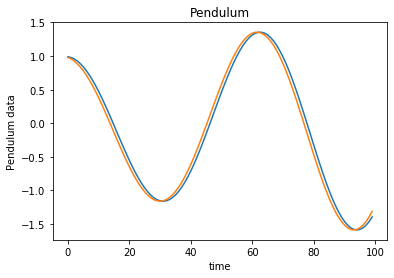

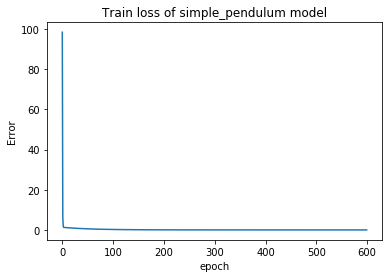

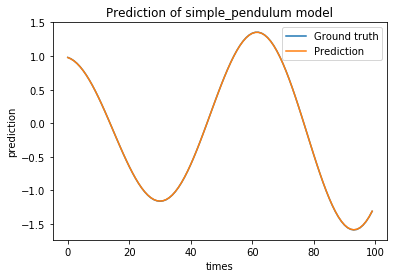

In [2]:
#set model_name=simple_pendulum
import run_pendulum

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  pendulum_bias


training pendulum model with bias:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[-0.5563,  0.0160],
        [ 0.3340,  0.0777]], requires_grad=True), Parameter containing:
tensor([-0.2806,  0.3245], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.9910,  0.9958],
        [-0.0098,  1.0000]], requires_grad=True), Parameter containing:
tensor([-0.0057, -0.0012], requires_grad=True)]


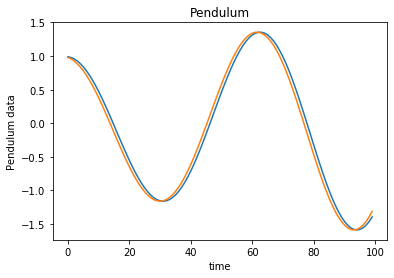

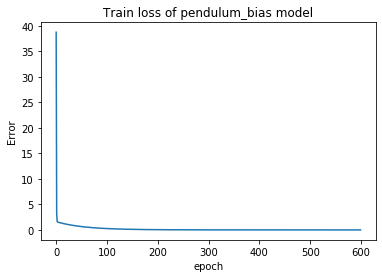

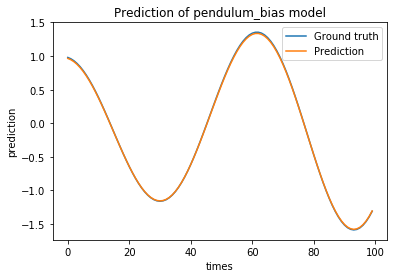

In [2]:
#set model_name=pendulum_bias
import run_pendulum

With these three runs, we observe that the model with the best convergence is the one with batch of size $10.$ Then the linear dynamical system layer can be validated. The next step is to add the quadratic term. 

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  pendulum_batch_10


training pendulum model with batch size 10:
Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[ 0.3189,  0.5622],
        [ 0.3088, -0.2255]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]], requires_grad=True)]


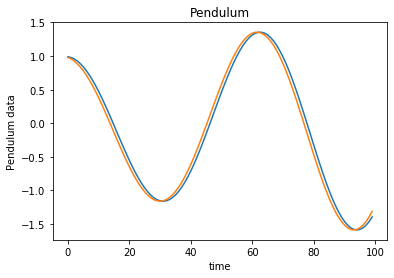

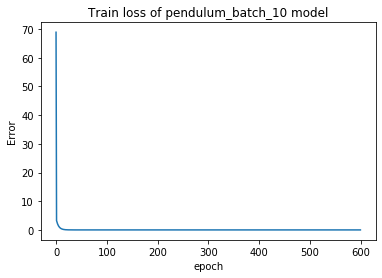

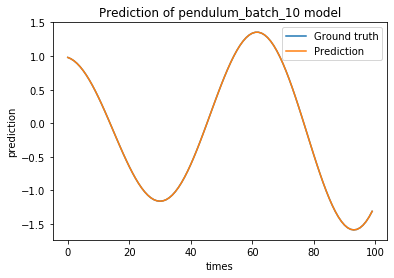

In [3]:
#set model_name=pendulum_batch_10
import run_pendulum

generate pendulum data
train_x.shape: torch.Size([100, 2])
train_y.shape: torch.Size([100, 2])


select model to train (simple_pendulum, pendulum_bias, pendulum_batch_10, non_lin_pendulum):  non_lin_pendulum


Real weigths of the matrix:
tensor([[ 1.0000,  1.0000],
        [-0.0100,  1.0000]])
Initial weigths of the matrix:
[Parameter containing:
tensor([[-0.0524,  0.0210],
        [-0.0460, -0.0845]], requires_grad=True), Parameter containing:
tensor([[[-2.9797e-05, -7.1611e-04],
         [-2.2105e-04, -9.6266e-04]],

        [[ 1.9218e-04,  8.4212e-04],
         [-3.8288e-04,  4.7217e-04]]], requires_grad=True)]
Final weigths of the matrix:
[Parameter containing:
tensor([[ 0.8205,  0.3823],
        [-0.0101,  0.8151]], requires_grad=True), Parameter containing:
tensor([[[-0.0663,  0.0025],
         [ 0.0030,  0.0002]],

        [[-0.0830, -0.0017],
         [-0.0030,  0.0063]]], requires_grad=True)]


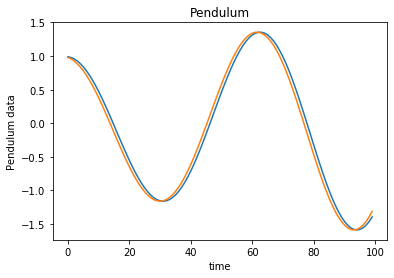

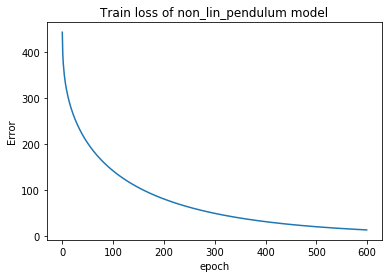

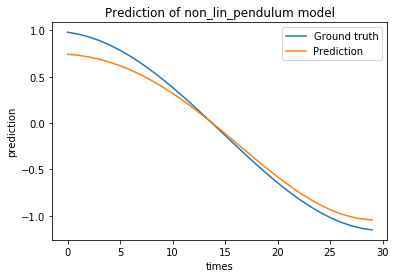

In [2]:
#set model_name=non_lin_pendulum
import run_pendulum

### Model analysis with noise
In this part, we analyze the behaviour of the model with noisy pendulum data. We perform forty simulations of the model with different values of selected hyperparameters. Since we add Gaussian with zero-mean and $\sigma^2-$variance.

The selected hyperparameters with their values are:
   - Noise variance in $\{0, 0.1, 0.2, 0.3, 0.4, 0.5\}$
   - Number of iterations/epochs in $\{200, 500, 1000\}$
   - Batch size in $\{10, 50, 100\}$
   
In the forty simulations, we iterate also on the different values of the selected hyperparameters. At each simulation, we take the minimum of three measurement of the model accuracy:
   - The loss function value: $L(W)=||\hat{y} - y||_F^2,$
   - The tensor norm of the linear part: $||\hat{H}_1-H_1||_F^2,$
   - The tensor norm of the quadratic part: $||\hat{H}_2-H_2||_F^2,$
   
the terms with " ^ " are the fitted values by the models.

In [ ]:
#If no csv files run this (TAKE A LOT OF TIME)
#set data_name = pendulum
import sim

In [3]:
#import csv-files if it exists
path_gen = '../gen_data/'
grid_df_pend = pd.read_csv(path_gen + 'pend_df_1000.csv')

For the first simulation, we fix the number of epoch at $1000$ and the batch size at $10$ and we observe how the three accuracy measurement vary as a function of the noise variance.

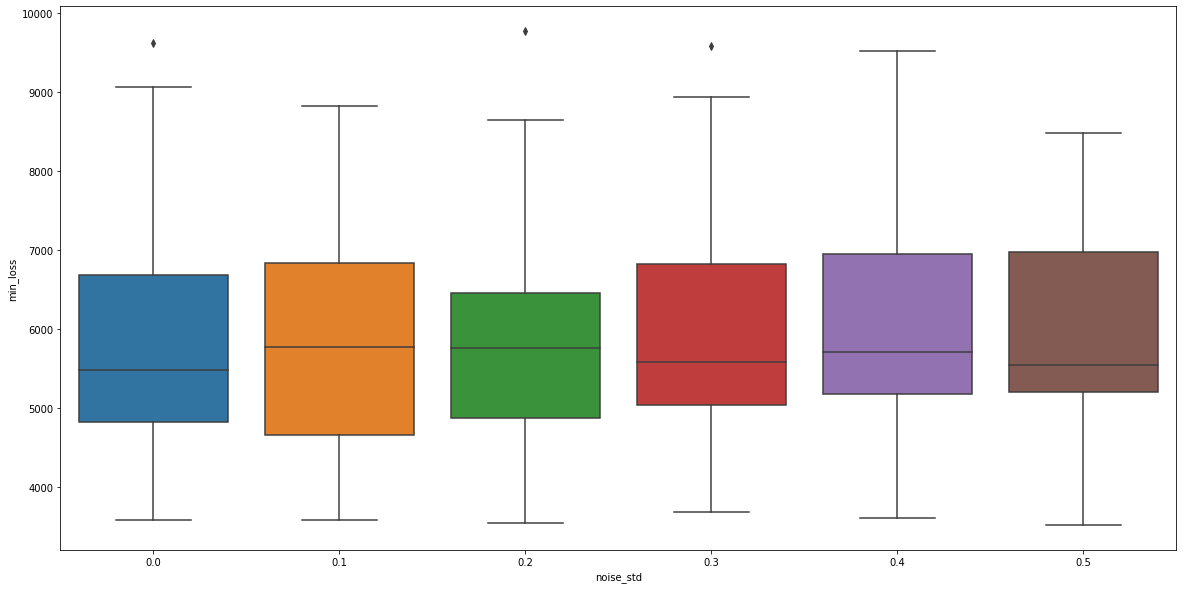

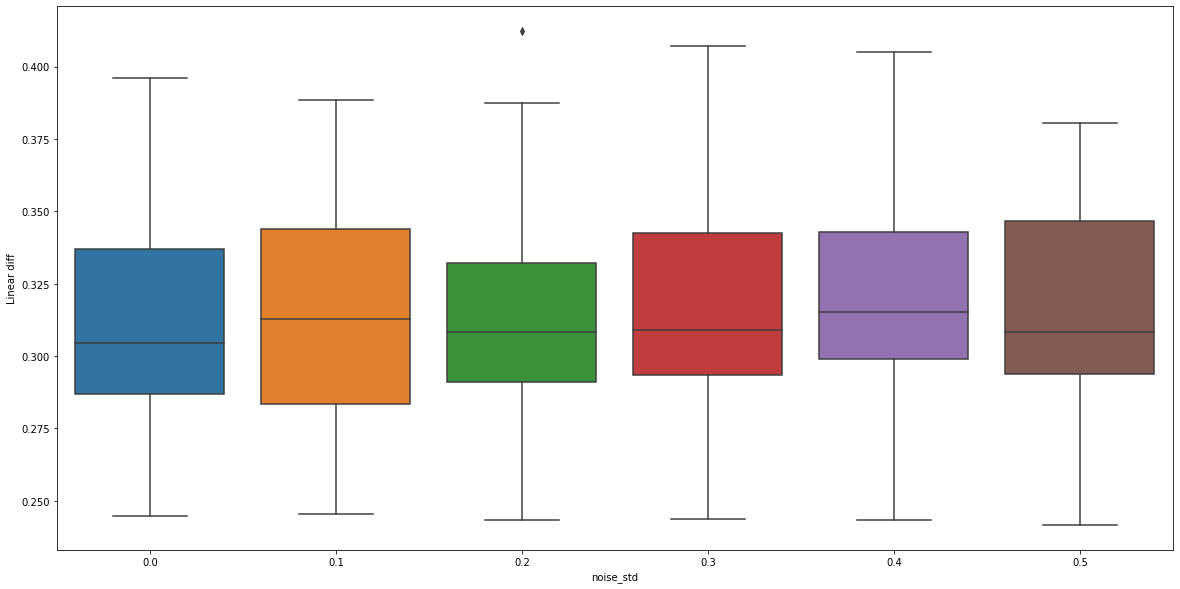

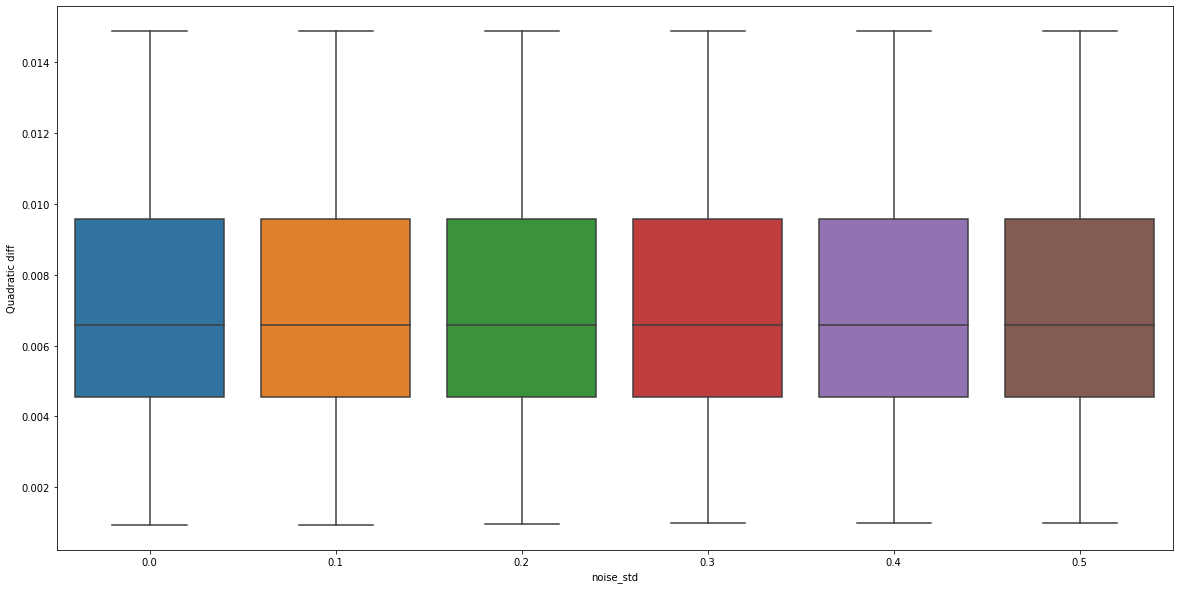

In [4]:
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='min_loss');
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Linear diff');
boxplot_feature(data=grid_df_pend, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Quadratic diff')

First of all, we observe that the measure with the quadratic term is constant, which is not surprising since we have a linear dynamical system, for the two other feature, there are some trends. The minimum of each measure increases if we add noise with small variance and stabilize or deacrese after some variance value and then increase again, which means that the noise plays a role of regularizer for the model.

It is also interesting to fix the noise and take the accuracy measurement as a function of other features such as the number of feature.

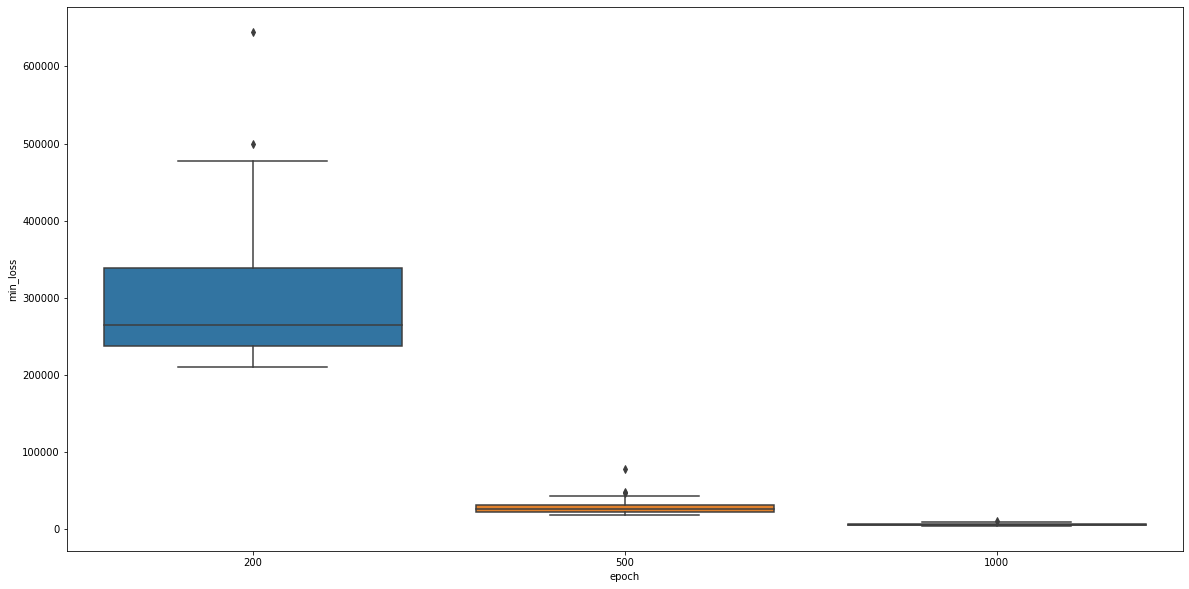

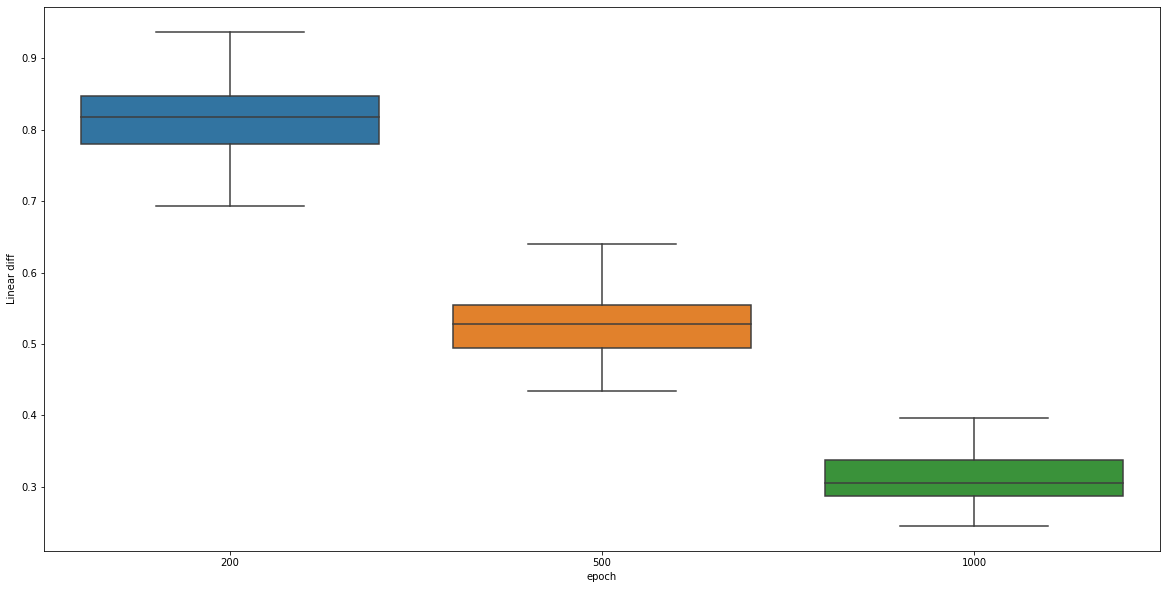

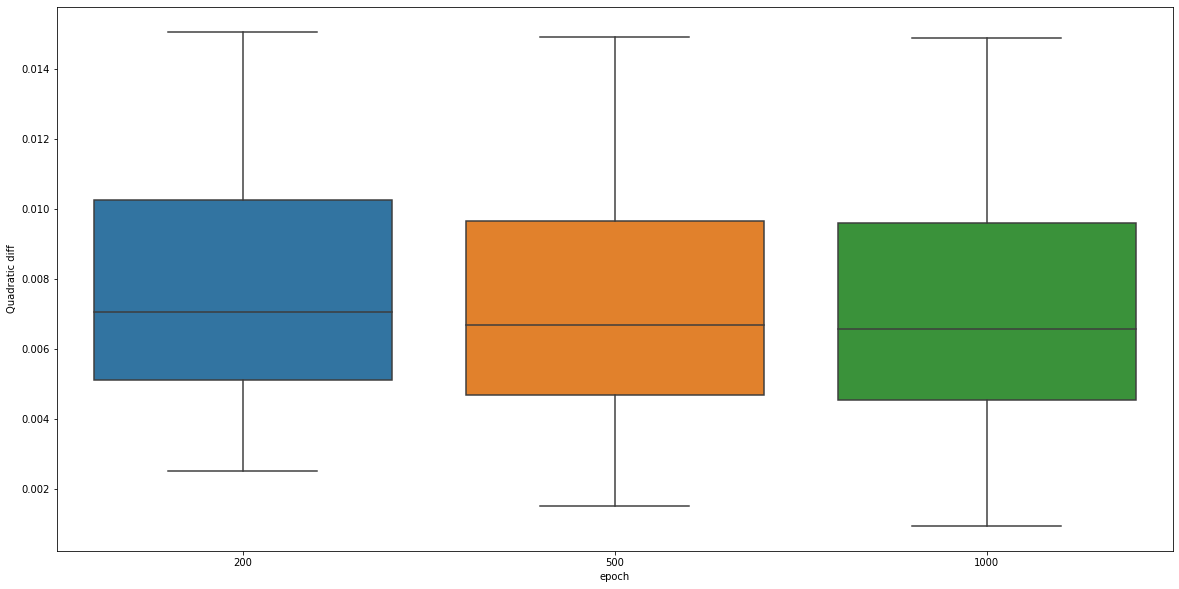

In [5]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='min_loss');
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Linear diff');
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Quadratic diff')

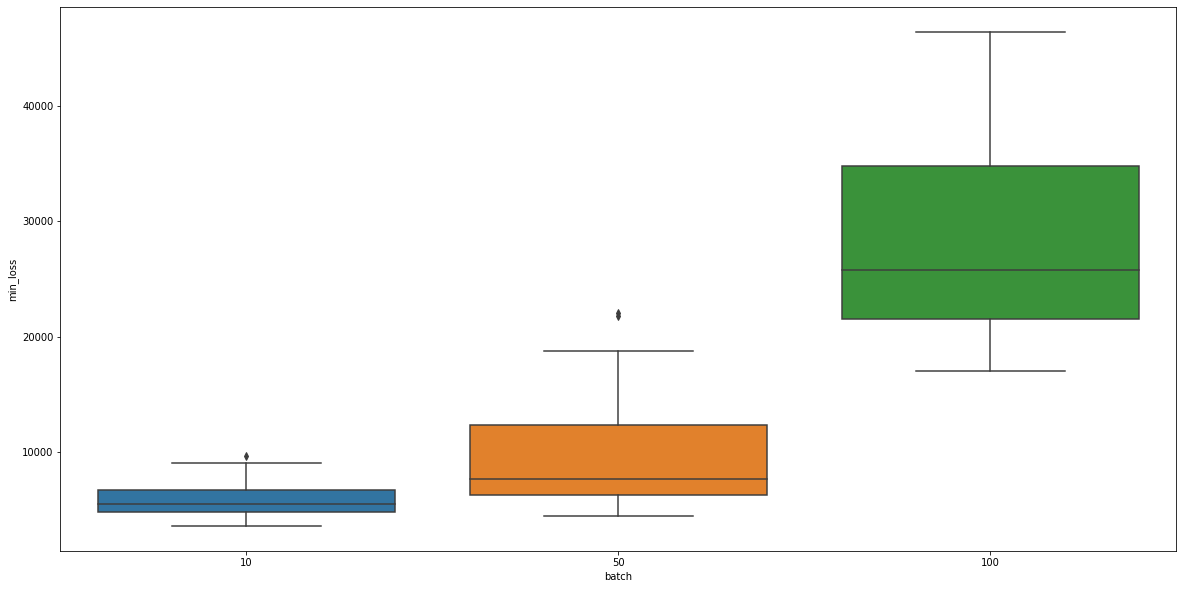

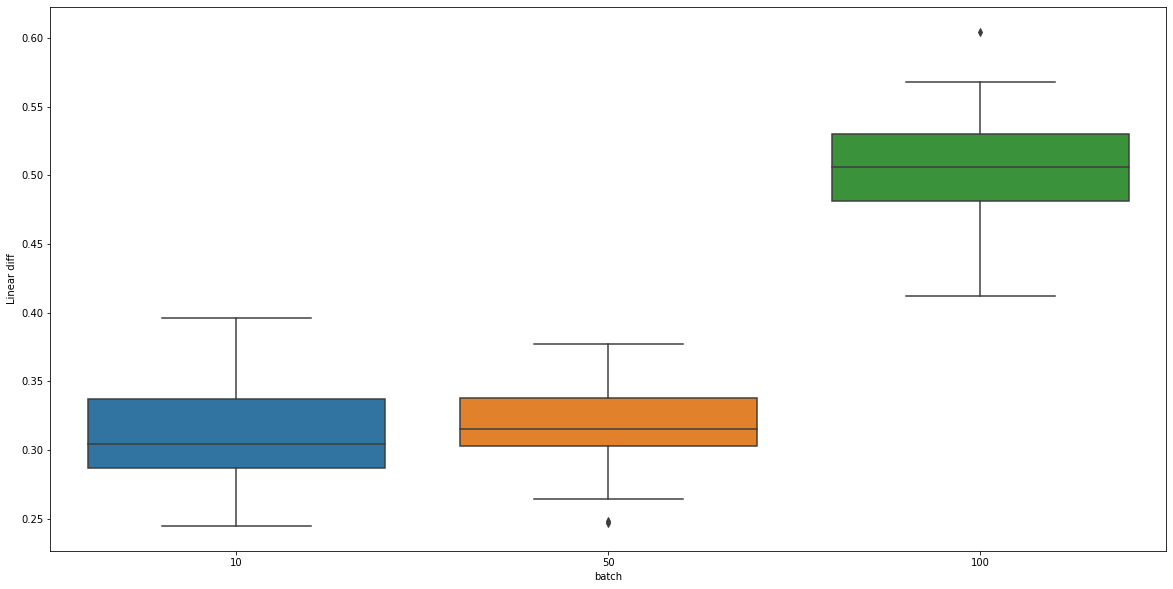

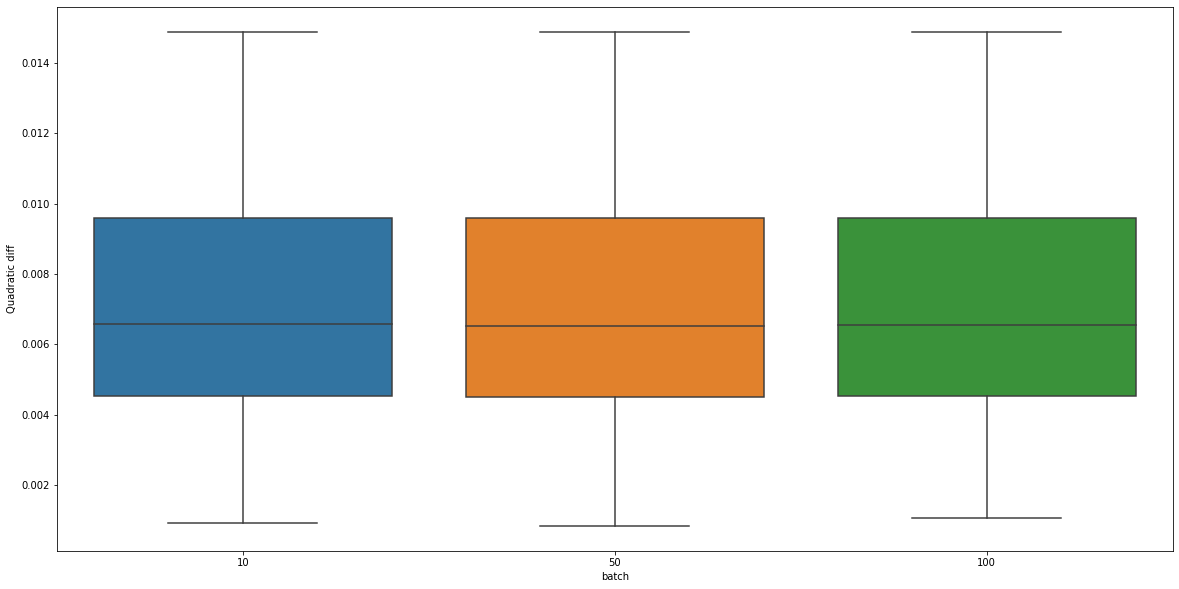

In [6]:
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='min_loss');
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Linear diff');
boxplot_feature(data=grid_df_pend, fixed_feat1='noise_std', val_feat1=0, fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Quadratic diff')

## Lorenz attractor

In [ ]:
#set model_name = non_linear
import run_lorenz

In [ ]:
#set model_name = non_linear_bias
import run_lorenz

### Model analysis with noise

In [ ]:
#If no csv files run this (TAKE A LOT OF TIME)
#set data_name = lorenz
import sim

In [9]:
grid_df_lorenz_1000 = pd.read_csv(path_gen + 'lorenz_df_1000.csv')
grid_df_lorenz_1000

,Unnamed: 0,noise_std,epoch,batch,min_loss,Linear diff,Quadratic diff,Linear,Quadratic
0,0,0.0,200,10,415.235054,33.025593,0.133424,[[ 0.2660012 0.34516168 0.00481499]\n [ 0.3...,[[[-7.09583797e-03 7.83991534e-03 8.44447222...
1,1,0.0,200,50,66.232870,32.987263,0.116629,[[ 0.34060892 0.4269496 0.06105396]\n [ 0.3...,[[[-0.00148063 0.00482754 0.00431253]\n [-0...
2,2,0.0,200,100,41.975578,33.012535,0.115472,[[ 0.33691448 0.36362654 0.06322888]\n [ 0.3...,[[[-0.00131757 0.00499924 0.00434631]\n [-0...
3,3,0.0,500,10,146.536859,33.020958,0.114964,[[ 0.42286003 0.4058006 0.057808 ]\n [ 0.3...,[[[-0.00100963 0.00493515 0.0034609 ]\n [-0...
4,4,0.0,500,50,33.612342,32.952980,0.125419,[[ 0.4109212 0.5945694 0.05995847]\n [ 0.3...,[[[-0.00160085 0.00515679 0.00358583]\n [-0...
...,...,...,...,...,...,...,...,...,...
2155,2155,0.5,500,50,36.860352,33.004920,0.117391,[[ 0.44619182 0.5621652 0.05610231]\n [ 0.3...,[[[-0.00057928 -0.00202912 0.00598058]\n [ 0...
2156,2156,0.5,500,100,23.821163,33.006050,0.121696,[[ 0.43050918 0.53700244 0.05877204]\n [ 0.3...,[[[-1.1153529e-04 -2.0302050e-03 6.1354749e-0...
2157,2157,0.5,1000,10,65.516961,33.094006,0.079342,[[ 0.5034227 0.44366065 0.06777187]\n [ 0.3...,[[[-0.00109634 -0.00182253 0.00533386]\n [ 0...
2158,2158,0.5,1000,50,22.808503,33.038460,0.104724,[[ 0.5035903 0.5947599 0.06572342]\n [ 0.3...,[[[-1.1299325e-03 -1.8228509e-03 5.3273714e-0...


In [ ]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='min_loss');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Linear diff');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Quadratic diff')

In [ ]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='min_loss');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Linear diff');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Quadratic diff')

In [ ]:
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='min_loss');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Linear diff');
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Quadratic diff')